#### Title: AI-Powered Candidate Ranking System Using Embeddings, LLM Prompt Engineering and vector search
This project aimed to leverage a talent sourcing and management company dataset to build a candidate ranking system. Specifically:

1. **Using the candidate profile dataset with keywords (“Aspiring human resources” or “seeking human resources”) to:**

* Predict candidate fitness for specific roles.

* Rank candidates based on predicted fitness.

* Re-rank candidates and ground LLM explanations in retrieved data

2. **Using the candidate profile dataset with screening scores to:**

* Fine-tune LLMs to specialize in recruitment and candidate evaluation.

#### Import liabraries 

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler


#### Load the dataset

In [3]:
file_path = r"C:\Users\USER\Documents\Potential_Talent\potential-talents - Aspiring human resources - seeking human resources.csv"
df = pd.read_csv(file_path)
df.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


#### Examine the shape of the dataset.

In [16]:
print(df.shape)

(104, 5)


Result above shown that the dataset has i04 rows and 5 columns

#### Eximine the data type

In [9]:
df.dtypes

id              int64
job_title      object
location       object
connection     object
fit           float64
dtype: object

#### Examine word frequencies in job_title and location using wordcloud

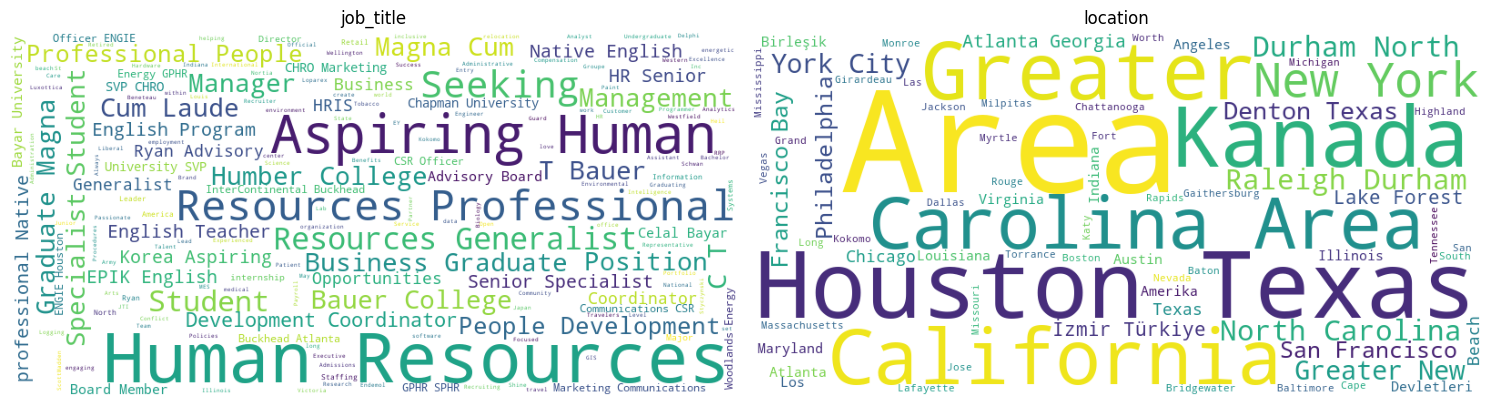

In [9]:
columns = ["job_title", "location"]  
fig, axes = plt.subplots(1, len(columns), figsize=(15, 6))

for ax, column in zip(axes, columns):
    text = " ".join(df[column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set_title(column)

plt.tight_layout()
plt.show()

From the visuals above, most candidates job title is human resources, most position is aspiring(entry level) and most of them live in Houston, Texas Kanada and California.



**Examine the dataset for completely empty rows**

In [11]:
# Check if there is a copletely empty rows in the dataset

completely_empty_rows = df[df.isnull( ).all(axis = 1)]
if not completely_empty_rows.empty:
    print("Number of completely empty rows:{len(completely_empty_rows)}")
else:
    print("No row is completely empty")

No row is completely empty


Result above shown that it has no completely empty row

**Examine the dataset for duplicated rows**

In [13]:
duplicated_rows = df[df.duplicated( )]
if not duplicated_rows.empty:
    print(f"Number of duplicated rows:{len(duplicated_rows)}")
    print("Duplicated rows are:")
    print(duplicated_rows)
else:
    print("There is no duplicate rows:")

There is no duplicate rows:


Result above shown that it has no duplicate rows

#### Column by column analysis

#### job_title column analysis

Examine job_title column for missing values

In [16]:
df["job_title"].isna().sum()

0

Result above shown that it has no missing value

Convert texts in the column to lower cases

In [67]:
df['job_title'] = df['job_title'].str.lower()

# preview
print(df['job_title'].head(10))

0    2019 c.t. bauer college of business graduate (...
1    native english teacher at epik (english progra...
2                aspiring human resources professional
3               people development coordinator at ryan
4      advisory board member at celal bayar university
5                  aspiring human resources specialist
6    student at humber college and aspiring human r...
7                                 hr senior specialist
8    student at humber college and aspiring human r...
9    seeking human resources hris and generalist po...
Name: job_title, dtype: object


Result above shown texts have been converted to lower cases.

codes below remove pontuation in the texts.

In [69]:
# remove punctuation and special characters, keep letters, numbers, and spaces
df['job_title'] = df['job_title'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
# preview
print(df['job_title'].head(10))

0    2019 ct bauer college of business graduate mag...
1    native english teacher at epik english program...
2                aspiring human resources professional
3               people development coordinator at ryan
4      advisory board member at celal bayar university
5                  aspiring human resources specialist
6    student at humber college and aspiring human r...
7                                 hr senior specialist
8    student at humber college and aspiring human r...
9    seeking human resources hris and generalist po...
Name: job_title, dtype: object


Codes below remove leading, trailing and multiple spaces between words in the texts.

In [71]:
# Remove leading/trailing spaces and multiple spaces between words
df['job_title'] = df['job_title'].str.strip()              # remove leading/trailing spaces
df['job_title'] = df['job_title'].str.replace(r'\s+', ' ', regex=True)  # replace multiple spaces with single space

#### location column analysis

Examine location for missing values

In [43]:
df["location"].isna().sum()

0

Result above show that it has no missing value

Codes below convert the texts in the column to lower cases

In [73]:
df['location'] = df['location'].str.lower()
print(df['location'].head(10))

0                         houston, texas
1                                 kanada
2    raleigh-durham, north carolina area
3                          denton, texas
4                        i̇zmir, türkiye
5             greater new york city area
6                                 kanada
7                 san francisco bay area
8                                 kanada
9              greater philadelphia area
Name: location, dtype: object


Result above shown that the texts have been converted to lower cases

Codes below removes puntuations in the column

In [75]:
df['location'] = df['location'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
print(df['location'].head(10))

0                        houston texas
1                               kanada
2    raleighdurham north carolina area
3                         denton texas
4                         izmir trkiye
5           greater new york city area
6                               kanada
7               san francisco bay area
8                               kanada
9            greater philadelphia area
Name: location, dtype: object


Codes below remove spaces in the column

In [77]:
df['location'] = df['location'].str.strip()
df['location'] = df['location'].str.replace(r'\s+', ' ', regex=True)

#### connection column analysis

In [ ]:
Examine it for missing values

In [51]:
df["connection"].isna().sum()

0

Rsult above shown it has no missing value

Codes below convert it from object to integer type

In [18]:
# remove '+' and convert to integer
df['connection'] = df['connection'].str.replace('+', '', regex=False).astype(int)
print(df['connection'].head(10))

0     85
1    500
2     44
3    500
4    500
5      1
6     61
7    500
8     61
9    500
Name: connection, dtype: int64


In [ ]:
codes below normalize it using minimum and maximum scaling.

In [24]:
# Round the scaled 'connection' column
df['connection'] = df['connection'].round(6)

# Check min and max again
print("Min connection:", df['connection'].min())
print("Max connection:", df['connection'].max())

Min connection: 0.0
Max connection: 1.0


In [85]:
df.head()

,id,job_title,location,connection,fit
0,1,2019 ct bauer college of business graduate mag...,houston texas,0.168337,NaN
1,2,native english teacher at epik english program...,kanada,1.000000,NaN
2,3,aspiring human resources professional,raleighdurham north carolina area,0.086172,NaN
3,4,people development coordinator at ryan,denton texas,1.000000,NaN
4,5,advisory board member at celal bayar university,izmir trkiye,1.000000,NaN


#### Save the cleaned data for reuse

In [89]:
# Specify full path and filename
#file_path = r"C:\Users\USER\Documents\Customer Intention\cleaned_dataset.csv"
file_path = r"C:\Users\USER\Documents\Potential Talent\cleaned_dataset.csv"

# Save DataFrame as CSV
df.to_csv(file_path, index=False)

print(f"Cleaned dataset saved to: {file_path}")

Cleaned dataset saved to: C:\Users\USER\Documents\Potential Talent\cleaned_dataset.csv
